### imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
import sys

### function used

In [2]:
def fx(x):
    return 3 * x**2 - 3 * x + 4


def deriv(x):
    return 6 * x - 3

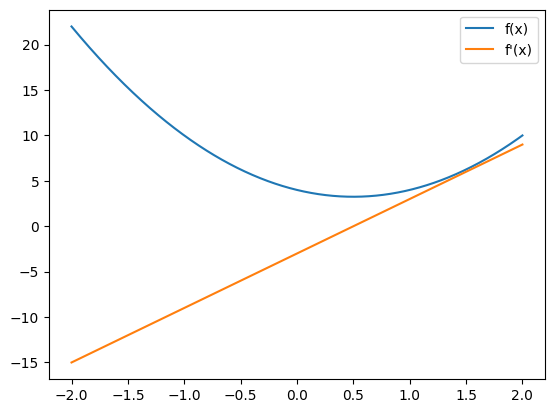

In [4]:
x = np.linspace(-2, 2, 1000)
plt.plot(x, fx(x), label="f(x)")
plt.plot(x, deriv(x), label="f'(x)")
plt.legend()
plt.show()

### run the experiment

In [5]:
epoch_lower = 10
epoch_high = 500
epoch_step = 300
lr_lower = 0.0001
lr_high = 0.01
lr_step = 300

LRS = np.linspace(lr_lower, lr_high, epoch_step)
epochs = np.round(np.linspace(epoch_lower, epoch_high, lr_step))
res = [[0 for _ in range(epoch_step)] for _ in range(lr_step)]

for i, LR in enumerate(LRS):
    for j, training_epochs in enumerate(epochs):
        local_min = 0
        for _ in range(int(training_epochs)):
            gradient = deriv(local_min)
            local_min -= LR * gradient

        msg = f"lr: {LR}, epochs: {training_epochs}, local_min: {local_min}"
        sys.stdout.write(f"\r{msg}")
        res[i][j] = np.round(local_min, 2)

# approx time: 1 min

lr: 0.0001, epochs: 10.0, local_min: 0.002991912946401793
lr: 0.0001, epochs: 12.0, local_min: 0.0035881437279547714
lr: 0.0001, epochs: 13.0, local_min: 0.0038859908417179984
lr: 0.0001, epochs: 15.0, local_min: 0.00448114905166464
lr: 0.0001, epochs: 17.0, local_min: 0.005075593286016301
lr: 0.0001, epochs: 18.0, local_min: 0.005372547930044691
lr: 0.0001, epochs: 20.0, local_min: 0.005965922806645892
lr: 0.0001, epochs: 21.0, local_min: 0.006262343252961904
lr: 0.0001, epochs: 23.0, local_min: 0.006854650695501921
lr: 0.0001, epochs: 25.0, local_min: 0.0074462475823415695
lr: 0.0001, epochs: 26.0, local_min: 0.0077417798337921645
lr: 0.0001, epochs: 28.0, local_min: 0.008332312485032354
lr: 0.0001, epochs: 30.0, local_min: 0.008922136709682811
lr: 0.0001, epochs: 31.0, local_min: 0.009216783427657001
lr: 0.0001, epochs: 33.0, local_min: 0.009805546605585847
lr: 0.0001, epochs: 35.0, local_min: 0.010393603479655922
lr: 0.0001, epochs: 36.0, local_min: 0.010687367317568128
lr: 0.0001,

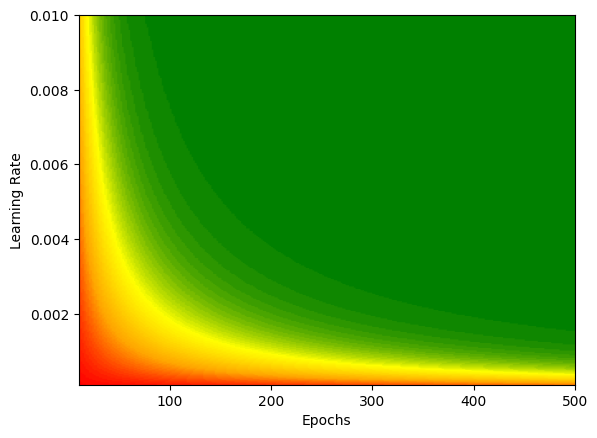

In [6]:
# plot the res matrix
cmap=LinearSegmentedColormap.from_list('rg',["red",'orange','yellow', "green"])
plt.imshow(res, extent=[epoch_lower, epoch_high, lr_lower, lr_high], aspect='auto', origin="lower", cmap=cmap)
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.show()